In [2]:
udc_file=open('ultimate_data_challenge.json', 'r')
udc_content=udc_file.read()
udc_file.close()

udc_data=json.loads(udc_content)

udc_df=pd.DataFrame(udc_data)
'''
udc_df=pd.read_json('ultimate_data_challenge.json',lines=True,orient="split",typ='series',
                   precise_float=True)
'''

'\nudc_df=pd.read_json(\'ultimate_data_challenge.json\',lines=True,orient="split",typ=\'series\',\n                   precise_float=True)\n'

In [3]:
udc_df.head(3)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.1,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.0,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.0,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0


In [4]:
udc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [5]:
udc_df[udc_df.signup_date.isnull()]

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct


In [6]:
udc_df[udc_df.last_trip_date.isnull()]

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct


In [7]:
udc_df['signup_date_ts']=pd.to_datetime(udc_df.signup_date)

In [8]:
udc_df['last_trip_date_ts']=pd.to_datetime(udc_df.last_trip_date)

The exact date when this data was pulled is not given, the information that we have is 
* the data was pulled several months later
* the `last_trip_date` column has the last time an user completed a trip

Based on the above two information, we can **assume that the latest date in the `last_trip_date` is the date when the data was pulled**. Based on this assumption, any user whose last trip date is more than 30 days from `max(last_trip_date)` would be an inactive user.

In [9]:
thirty_day_delta = pd.Timedelta('30 days')
todays_date = max(udc_df.last_trip_date_ts)
print(todays_date)

2014-07-01 00:00:00


In [10]:
udc_df['IsActive']= todays_date - udc_df.last_trip_date_ts <= thirty_day_delta

In [76]:
udc_df.head(3)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,signup_date_ts,last_trip_date_ts,IsActive
0,3.67,5.0,4.7,1.1,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,2014-01-25,2014-06-17,True
1,8.26,5.0,5.0,1.0,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,2014-01-29,2014-05-05,False
2,0.77,5.0,4.3,1.0,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,2014-01-06,2014-01-07,False


In [256]:
#% retained users
udc_df.IsActive.sum()/len(udc_df)

0.37608000000000003

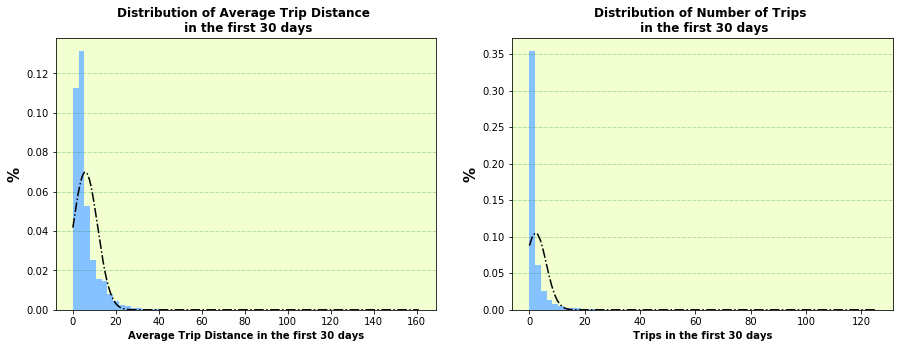

In [30]:
f,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
ax1,ax2 = ax.flatten()

ax1.set_facecolor(color='#f1ffd1')
ax1.grid(False, 'major','y', ls='-.', lw=.5, c='g', alpha=.5)

data=sorted(udc_df['avg_dist'])
fit = stats.norm.pdf(data, np.mean(data), np.std(data))  #this is a fitting indeed

ax1.set_title('Distribution of Average Trip Distance \n in the first 30 days',weight='extra bold')
ax1.set_xlabel('Average Trip Distance in the first 30 days',weight='bold')
ax1.set_ylabel('%',fontsize=15,weight='bold')

ax1.plot(data,fit,'-.', color='k')
ax1.hist(data,bins=60,normed=True,color='#85C2FF')
ax1.spines['top'].set_visible(True)


ax2.set_facecolor(color='#f1ffd1')
ax2.grid(False, 'major','y', ls='-.', lw=.5, c='g', alpha=.5)

data=sorted(udc_df['trips_in_first_30_days'])
fit = stats.norm.pdf(data, np.mean(data), np.std(data))  #this is a fitting indeed

ax2.set_title('Distribution of Number of Trips \n in the first 30 days',weight='extra bold')
ax2.set_xlabel('Trips in the first 30 days',weight='bold')
ax2.set_ylabel('%',fontsize=15,weight='bold')

ax2.plot(data,fit,'-.', color='k')
ax2.hist(data,bins=60,normed=True,color='#85C2FF')
ax2.spines['top'].set_visible(True)


plt.show()

The above plots show the distribution of the average trip distance and the number of trip taken in the first 30 days. The distribution is skewed with most of the users taking less than 20 trips. 

In [77]:
udc_df_temp=udc_df[['avg_dist','trips_in_first_30_days','phone','city','IsActive']]
#udc_df_temp['label']=' '

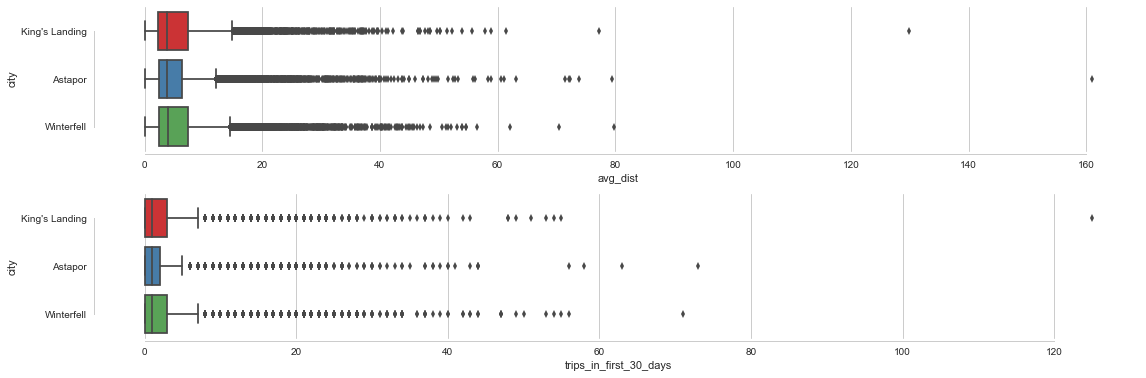

In [72]:
f,ax=plt.subplots(nrows=2,ncols=1
                  ,figsize=(15,5))
ax1,ax2 = ax.flatten()
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)
sns.set(style="whitegrid", palette="pastel", color_codes=True)

#sns.boxplot(y=udc_df['avg_dist'], hue=udc_df['city'],palette="PRGn",ax=ax1)
#sns.boxplot(y=udc_df['trips_in_first_30_days'], hue=udc_df['city'], palette="PRGn",ax=ax2)
sns.boxplot(y="city",x="avg_dist", data=udc_df_temp, palette="Set1",ax=ax1)
sns.boxplot(y="city",x="trips_in_first_30_days", data=udc_df_temp, palette="Set1",ax=ax2)

sns.despine(offset=3, trim=True)
plt.show()

Above box plots show the distribution by the users city. From the charts we see that all three city users have similar patterns with Astapor users riding less than the other two city users.

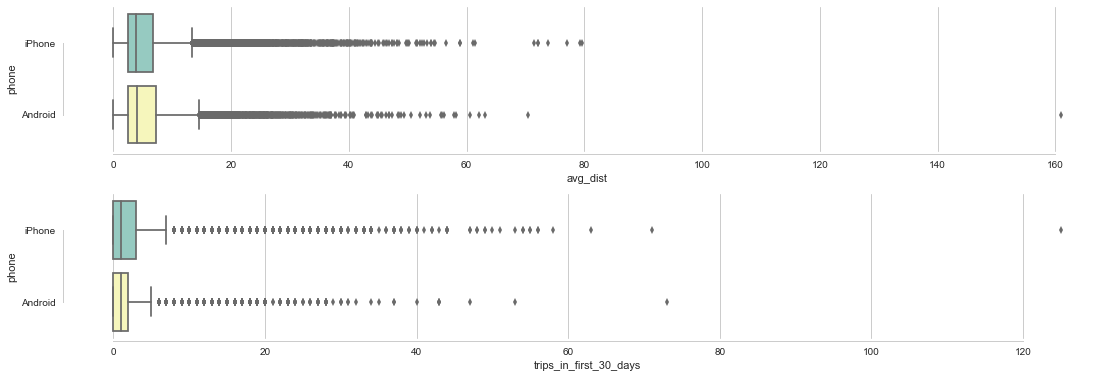

In [75]:
f,ax=plt.subplots(nrows=2,ncols=1
                  ,figsize=(15,5))
ax1,ax2 = ax.flatten()
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)
sns.set(style="whitegrid", palette="pastel", color_codes=True)

#sns.boxplot(y=udc_df['avg_dist'], hue=udc_df['city'],palette="PRGn",ax=ax1)
#sns.boxplot(y=udc_df['trips_in_first_30_days'], hue=udc_df['city'], palette="PRGn",ax=ax2)
sns.boxplot(y="phone",x="avg_dist", data=udc_df_temp, palette="Set3",ax=ax1)
sns.boxplot(y="phone",x="trips_in_first_30_days", data=udc_df_temp, palette="Set3",ax=ax2)

sns.despine(offset=3, trim=True)
plt.show()

Above box plots show the distribution by the type of phone. Though the average distance travelled by iPhone and Android distance are similar, the number of trips taken by Android users are much less than iPhone users. This may suggest that the number of Android users are less or that most of the Android users have similar ride patterns.


In [81]:
len(udc_df_temp[udc_df_temp['phone'].isnull()]) #396 rows where information on the type of phone is not available

396

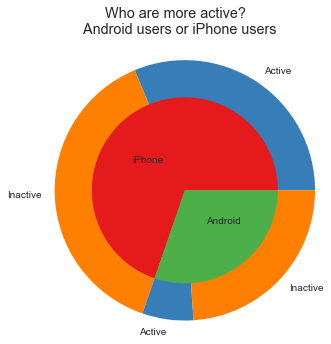

In [134]:
vals = np.array([
                [len(udc_df_temp[(udc_df_temp['phone']=='iPhone')&(udc_df_temp['IsActive'])]), 
                 len(udc_df_temp[(udc_df_temp['phone']=='iPhone')&(~udc_df_temp['IsActive'])])
                ], 
                [len(udc_df_temp[(udc_df_temp['phone']=='Android')&(udc_df_temp['IsActive'])]),  
                 len(udc_df_temp[(udc_df_temp['phone']=='Android')&(~udc_df_temp['IsActive'])])
                ]
                ]
                )
fig, ax = plt.subplots()
plt.tight_layout(pad=6.0)
ax.pie(vals.flatten(), radius=1.4,
       colors=['#377eb8','#ff7f00'],labels=['Active','Inactive','Active','Inactive'])
ax.pie(vals.sum(axis=1), radius=1,colors=['#e41a1c','#4daf4a'],labels=['iPhone','Android'],labeldistance=0.4)
ax.set(aspect="equal")
plt.suptitle('Who are more active? \n Android users or iPhone users')
plt.show()

The above pie chart shows that there are a greater number of iPhone users than Android users and the propotion of active users is higher among iPhone users. This is something Ultimate Inc would be interested in looking at,
* Why are there lesser Android users? - is it because iPhone is more popular or is there a bud reputation for the Android app
* Why is the % of active users much lesser for Android users? This could suggest that the Android app may have some issues

***
### Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system.


In [149]:
#check if all the users signed up in Jan
(udc_df.signup_date_ts.dt.month!=1).sum()

0

In [152]:
udc_df.columns

Index(['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
       'city', 'last_trip_date', 'phone', 'signup_date', 'surge_pct',
       'trips_in_first_30_days', 'ultimate_black_user', 'weekday_pct',
       'signup_date_ts', 'last_trip_date_ts', 'IsActive'],
      dtype='object')

Features to be used in the model
* city: city this user signed up in (categorical - will be dummied out)
* phone: primary device for this user (categorical - will be dummied out)
* avg_dist: the average distance in miles per trip taken in the first 30 days after signup
* avg_rating_by_driver: the rider’s average rating over all of their trips
* avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips
* surge_pct: the percent of trips taken with surge multiplier > 1
* avg_surge: The average surge multiplier over all of this user’s trips
* trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up
* ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days; FALSE otherwise (categorical - will be dummied out)
* weekday_pct: the percent of the user’s trips occurring during a weekday

In [162]:
udc_df['androidUser'] = udc_df['phone'].map(lambda x: 1 if x=='Android' else 0)
udc_df['iphoneUser'] = udc_df['phone'].map(lambda x: 1 if x=='iPhone' else 0)
udc_df['kingsCity'] = udc_df['city'].map(lambda x: 1 if x=="King's Landing" else 0)
udc_df['astaporCity'] = udc_df['city'].map(lambda x: 1 if x=='Astapor' else 0)
udc_df['winterCity'] = udc_df['city'].map(lambda x: 1 if x=='Winterfell' else 0)
udc_df['ulBUser']=udc_df['ultimate_black_user'].map(lambda x: 1 if x else 0)

In [164]:

udc_df.columns

Index(['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
       'city', 'last_trip_date', 'phone', 'signup_date', 'surge_pct',
       'trips_in_first_30_days', 'ultimate_black_user', 'weekday_pct',
       'signup_date_ts', 'last_trip_date_ts', 'IsActive', 'androidUser',
       'iphoneUser', 'kingsCity', 'astaporCity', 'winterCity', 'ulBUser'],
      dtype='object')

In [166]:
pred_model_data_df=udc_df[['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge','surge_pct',
       'trips_in_first_30_days', 'weekday_pct',
       'androidUser',
       'iphoneUser', 'kingsCity', 'astaporCity', 'winterCity', 'ulBUser','IsActive']]

In [169]:
pred_model_data_df.avg_dist.isnull().sum()

0

In [172]:
pred_model_data_df.avg_rating_by_driver.isnull().sum()

201

In [175]:
#fill nulls with average of all user rating
fillval=pred_model_data_df.avg_rating_by_driver.mean()
pred_model_data_df.avg_rating_by_driver=pred_model_data_df.avg_rating_by_driver.fillna(value=fillval)

C:\Anac\lib\site-packages\pandas\core\generic.py:2999: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [176]:
pred_model_data_df.avg_rating_by_driver.isnull().sum()

0

In [178]:
pred_model_data_df.avg_rating_of_driver.isnull().sum()

8122

In [179]:
#fill nulls with average of all user rating
fillval=pred_model_data_df.avg_rating_of_driver.mean()
pred_model_data_df.avg_rating_of_driver=pred_model_data_df.avg_rating_of_driver.fillna(value=fillval)

C:\Anac\lib\site-packages\pandas\core\generic.py:2999: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [180]:
pred_model_data_df.avg_rating_of_driver.isnull().sum()

0

In [184]:
pred_model_data_df.isnull().sum()

avg_dist                  0
avg_rating_by_driver      0
avg_rating_of_driver      0
avg_surge                 0
surge_pct                 0
trips_in_first_30_days    0
weekday_pct               0
androidUser               0
iphoneUser                0
kingsCity                 0
astaporCity               0
winterCity                0
ulBUser                   0
IsActive                  0
dtype: int64

### Predictive Modeling
This is a classification problem where with the given data, we try to classify if the user will be retained after 6 months. Two models will be built,
1. Logistic Regression
2. Random Forest Classifier

The Logistic Regression is a simple classification model that will help is establishing the baseline performance that can be expected from ML models. I have used Random Forest Classifier as the next model because
* Usually ensemble methods have better performance in these types of classification problems
* Ultimate Inc is not only interested in the accuracy, but also to understand which factors are the most important in determining if a user can be retained or not

For each model, the parameters have been arrived at using Cross Validation.

In [186]:
train_df, test_df = train_test_split(pred_model_data_df,test_size=0.2,random_state=1)

In [197]:
from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV

C:\Anac\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Anac\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [202]:
Xtrain=train_df.iloc[:,:-1]#all the features
Ytrain=train_df.iloc[:,-1:]#active user flag to bepredicted
Xtest=test_df.iloc[:,:-1]#all the features
Ytest=test_df.iloc[:,-1:]#active user flag to bepredicted

In [203]:
Xtrain.shape,Ytrain.shape,Xtest.shape,Ytest.shape

((40000, 13), (40000, 1), (10000, 13), (10000, 1))

In [219]:
X = Xtrain.as_matrix().astype(np.float)
Y = Ytrain.as_matrix().astype(np.float)
Y=Y.ravel()

In [220]:
logreg=LogisticRegression()
logreg.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [221]:
logreg.score(X,Y),logreg.score(Xtest,Ytest)

(0.71892500000000004, 0.71530000000000005)

In [222]:
parameters = {}
logregclf = LogisticRegression()
fitmodel = GridSearchCV(logregclf, param_grid=parameters, scoring="accuracy")
fitmodel.fit(X,Y)
print('***best estimator:',fitmodel.best_estimator_)
print('***best params:',fitmodel.best_params_)
print('***best score:',fitmodel.best_score_)
print('***grid scores:', fitmodel.grid_scores_)


***best estimator: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
***best params: {}
***best score: 0.7187
***grid scores: [mean: 0.71870, std: 0.00192, params: {}]


In [223]:
fitmodel.best_estimator_.score(Xtest,Ytest)

0.71530000000000005

Logistic Regression model gives an accuracy of approx. 71.5%

In [297]:
random_guesses = [random.randint(0,1) for x in range(10000)]

In [311]:
#accuracy if we used random guesses as the prediction
abs((pd.Series(Ytest['IsActive'].map(lambda x: 1 if x else 0)).reset_index(drop=True))-pd.Series(random_guesses)).sum()/len(Ytest)


0.4884

A model built on just random guesses will be close to 50% accurate. Any model that is built should be better than this

In [224]:
from sklearn.ensemble import RandomForestClassifier

In [225]:
rf1clf = RandomForestClassifier()

In [226]:
rf1clf.fit(X,Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [227]:
rf1clf.score(Xtest,Ytest)

0.74239999999999995

In [243]:
parameters = {"n_estimators": [5,10,20,40,60],"max_features":['auto','sqrt','log2'],"max_depth":[10,15,20]}
rfclf = RandomForestClassifier(n_jobs=-1)

In [244]:
fitmodel = GridSearchCV(rfclf, param_grid=parameters, scoring="accuracy")
fitmodel.fit(X,Y)
print('***best estimator:',fitmodel.best_estimator_)
print('***best params:',fitmodel.best_params_)
print('***best score:',fitmodel.best_score_)
#print('***grid scores:', fitmodel.grid_scores_)

***best estimator: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='log2', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=60, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
***best params: {'max_depth': 10, 'max_features': 'log2', 'n_estimators': 60}
***best score: 0.783


In [245]:
rf2clf = fitmodel.best_estimator_

In [246]:
rf2clf.fit(X,Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='log2', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=60, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [247]:
rf2clf.score(Xtest,Ytest)

0.78549999999999998

The Random Forest classifier is approx. 78.5% accurate.

In [249]:
feat_importance = rf2clf.feature_importances_
#sort the feature by importance, from the most important ones to least important ones
feat_imp_sort_ix=feat_importance.argsort()[::-1]
#the most important features are
train_df.columns[feat_imp_sort_ix[0:10]]

Index(['avg_rating_by_driver', 'weekday_pct', 'surge_pct', 'kingsCity',
       'avg_surge', 'trips_in_first_30_days', 'ulBUser', 'avg_dist',
       'androidUser', 'iphoneUser'],
      dtype='object')

These are the most important features that indicate if a user will be retained or not.

In [250]:
from sklearn.metrics import confusion_matrix
import itertools

In [253]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    fig, axes = plt.subplots(figsize=(5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=20)
    #plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    #plt.tight_layout()
    plt.ylabel('True label', fontsize=20)
    plt.xlabel('Predicted label', fontsize=20)

Normalized confusion matrix
[[ 0.8611201   0.1388799 ]
 [ 0.33673469  0.66326531]]


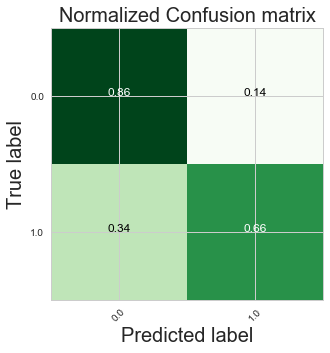

In [254]:
Ypred=rf2clf.predict(Xtest)
cnf_matrix = confusion_matrix(Ytest, Ypred)
plot_confusion_matrix(cnf_matrix, classes=rf2clf.classes_, normalize=True,
                      title='Normalized Confusion matrix')
#plt.savefig('ConfusionMatrix.png')
plt.show()

The above confusion matrix shows that the model is more accurate (86% accuracy) at predicting users who not be retained than predicting users who will be retained. 